# Practical Session 1
## Biomedical Signal and Images
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Evgenia Papavasileiou, Hamza Mekhzoum, Jef Vandemeulebroucke<br>
<br>
Questions email or Teams: hamza.mekhzoum@vub.be

<font color=blue>Students names and IDs: </font> <Br>
<font color=blue>Academic Year </font>: 2023-2024

In all the practical sessions of this course we will use python 3 and jupyter notebooks. We will use google´s environment called 'colab'. https://colab.research.google.com .You will only need a gmail. Colab is equipped with most of the libraries 
we will need in this semester. In case a module is not installed, you can install it with 'pip'. 

# Purpose
The purpose of this exercise session is to obtain insight into the basic signal processing concepts; aliasing, Fourier transform and filtering commonly applied in medical signal and image analysis. For more information on these concepts, check the course slides and notes. 

The jupyter notebook should be submitted as the report of each practical session by teams of <b>two </b> students. In colab you should download the notebook in the format \*.ipynb and save it as a pdf version through print->save as pdf. <b>Both</b> the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline. The <b>deadline</b> for the first report is the <b>21st of November 2023 at 23:59</b>. Any report sent after the deadline will not be graded.

### Required modules

During this practical session, the following libraries will be used:
- numpy
- matplotlib
- scipy

To import any external library, you need to import it using the **import** statement followed by the name of the library.

### Exercise 1: Discrete Fourier Transform

Consider a sine wave signal with frequency f=5Hz and duration Tt=1s. Sample the signal with a sampling frequency fs=256Hz.

Generate the fourier transform, i.e. the spectral decomposition of the signal.

Spectral decomposition is the process by which a signal can be expressed as the sum of sinusoids with different frequencies (spectrum).

Report:
- Plot the sampled signal (use discrete points '*'). You can define the time axis with function https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html 
Be careful <b>not</b> to include the last point of the generated time axis

- Calculate the fourier transform of the discrete signal using functions https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html and plot the magnitude of its fourier transform with the help of function https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html


Do not forget to label the axes accordingly.

*Hint:*
Since we are going to compute a fourier transform in all the exercises of this WPO, it is better to define a function 

e.g def create_fourier_transform(signal,fs):

        .......
        
        return frequencies,fourier_transform


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

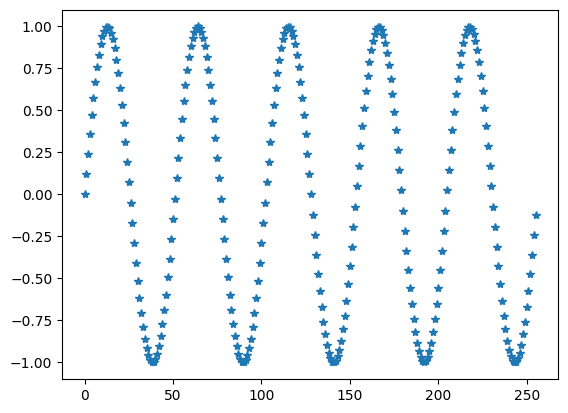

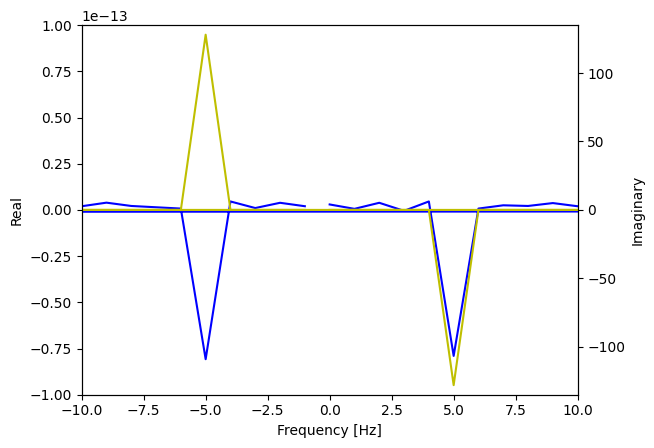

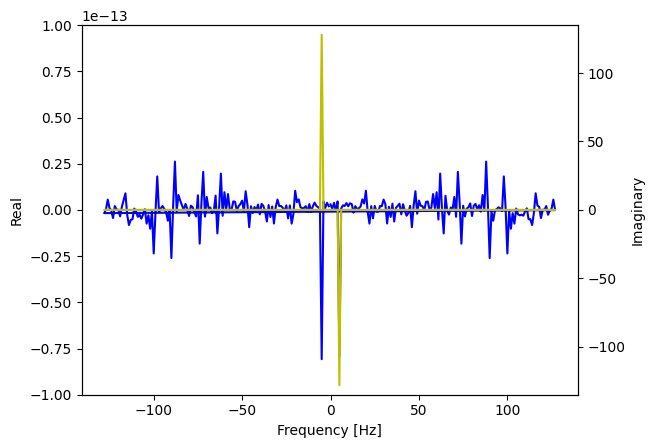

In [2]:
def create_fourier_transform(signal,fs):
    fourier_transform = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal),1/fs)
    return frequencies,fourier_transform

t=np.linspace(0,1,256, endpoint=False)
signal = np.sin(2*np.pi*5*t)
plt.plot(signal,'*')
plt.show()

for i in range(0,2):
    freq,sp = create_fourier_transform(signal,256)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.set_xlabel('Frequency [Hz]')
    ax1.plot(freq, sp.real, 'b-')
    ax1.set_ylabel('Real')
    ax2.plot(freq, sp.imag, 'y-')
    ax2.set_ylabel('Imaginary')
    ax1.set_ylim(-1e-13,1e-13)
    ax2.set_ylim(-135,135)
    if i==0: plt.xlim(-10,10)
    plt.show()

From the spectrum analysis of the signal, where do you see the frequency?

<font color=blue>Your reply here:</font>
*** The plot is self-explanatory. we see 2 peaks at 5Hz and 5Hz (but in negatives). The negative frequency is the mirror image of the positive frequency.***
the phase discrete is 0.05 (arctan(inf)/(2pi*5) and arctan(-inf)/(2pi*-5)).
the amplitude is 0.5 (sqrt(128**2+0**2)/256)


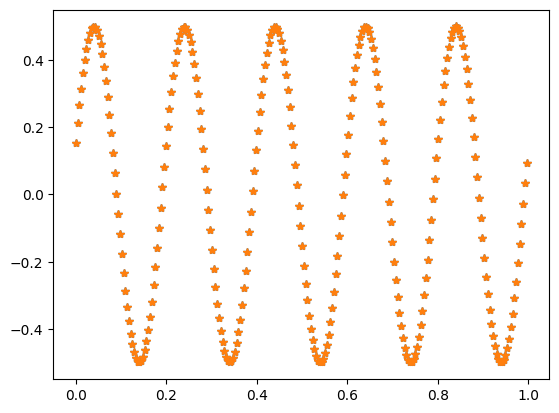

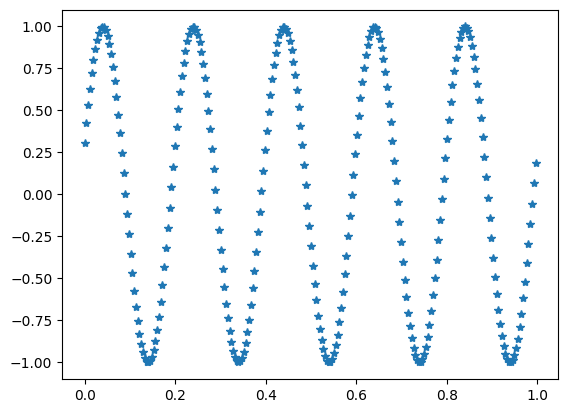

In [3]:
atpos5 = 0.5*np.sin(2*np.pi*5*t+0.05*2*np.pi)
atneg5 = 0.5*np.sin(2*np.pi*5*t+0.05*2*np.pi)
plt.plot(t,atpos5,'*')
plt.plot(t,atneg5,'*')
plt.show()
plt.plot(t,atpos5+atneg5,'*')

### Exercise 2: Sampling
Generate a signal with a duration of 1s that consists of the sum of the following harmonics. Each harmonic is given by the equation $ amplitude sin(2 \pi t f) $

- 10 Hz with amplitude 0.3
- 30 Hz with amplitude 0.4
- 50 Hz with amplitude 0.5
- 80 Hz with amplitude 0.2 \
Step 1. Compute the Fourier transform when the frequency spectrum is sampled at 200Hz.\
Step 2 Change the sampling frequency to 100Hz and compute the Fourier transform again.\
Report:
- Plot the signal sampled at the two different sample frequencies( Use a continuous line and not discrete points)
- Plot the two Fourier transforms with the two different sampling frequencies.


for 200 sample rate


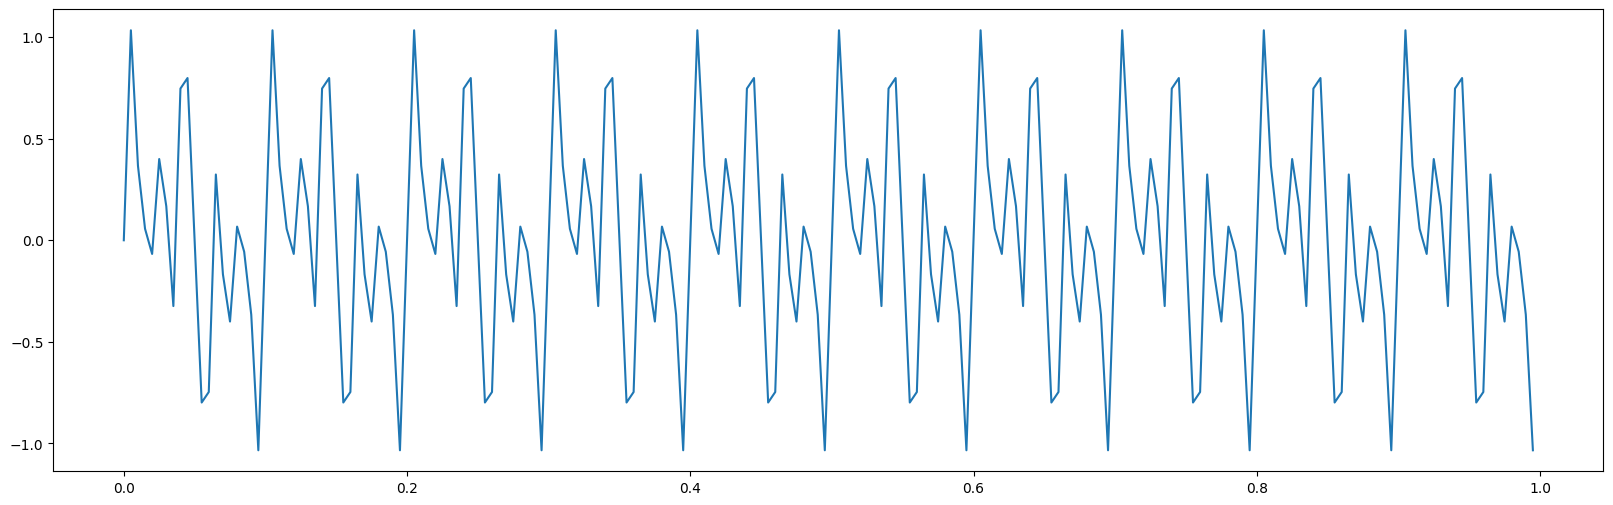

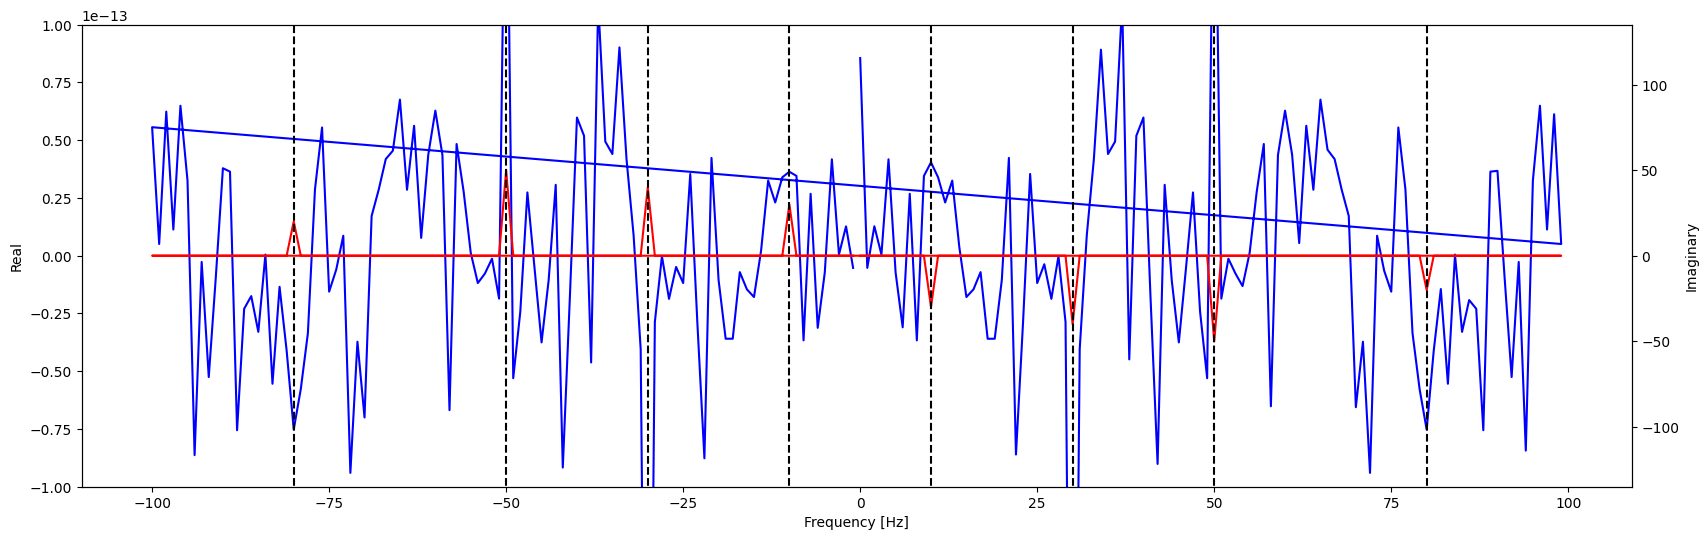




for 100 sample rate


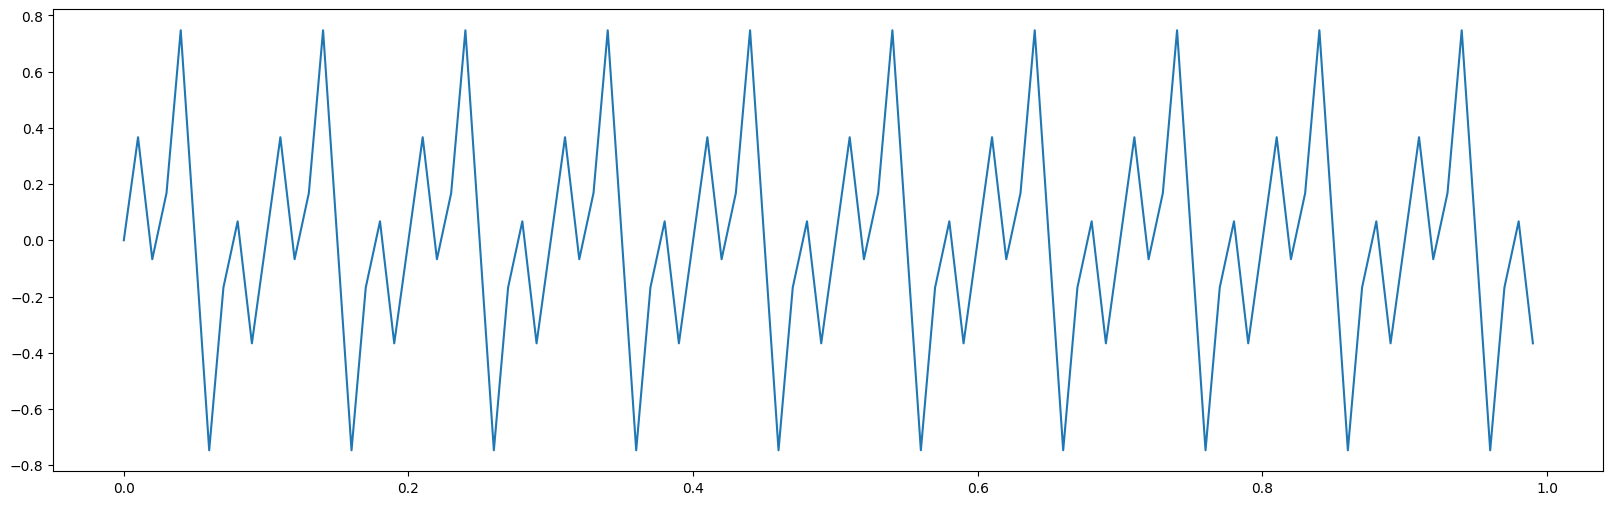

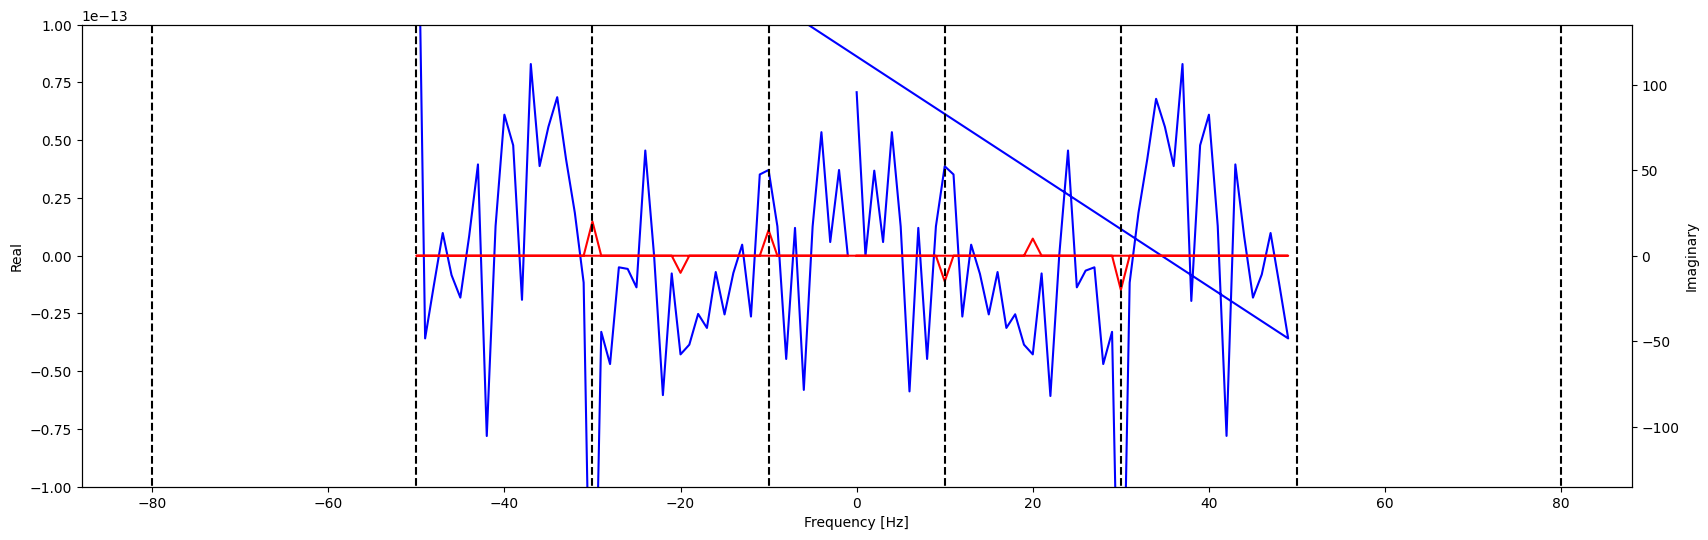

In [4]:
def f(harm):
    plt.figure(figsize=(20,6))
    plt.plot(np.linspace(0,1,len(harm), endpoint=False), harm)
    plt.show()

    freq,sp = create_fourier_transform(harm,len(harm))
    fig, ax1 = plt.subplots()
    fig.set_size_inches(20, 6)
    ax2 = ax1.twinx()
    ax1.set_xlabel('Frequency [Hz]')
    ax1.plot(freq, sp.real, 'b-')
    ax1.set_ylabel('Real')
    ax2.plot(freq, sp.imag, 'r-')
    ax2.set_ylabel('Imaginary')
    ax1.set_ylim(-1e-13,1e-13)
    ax2.set_ylim(-135,135)
    plt.vlines([10,30,50,80,-10,-30,-50,-80], -1e3, 1e3, colors='k', linestyles='dashed')
    # plt.xlim(-10,10)
    plt.show()


harm = lambda a,f,sr=200: a*np.sin(2*np.pi*f*np.linspace(0,1,sr, endpoint=False))
harm_200 = np.sum([harm(0.3,10),harm(0.4,30),harm(0.5,50),harm(0.2,80)], axis=0)
import IPython

harm = lambda a,f,sr=100: a*np.sin(2*np.pi*f*np.linspace(0,1,sr, endpoint=False))
harm_100 = np.sum([harm(0.3,10),harm(0.4,30),harm(0.5,50),harm(0.2,80)], axis=0)

print("for 200 sample rate")
f(harm_200)

print("\n\n\nfor 100 sample rate")
f(harm_100)

Describe what do you observe in the generated spectrums and why.

<font color=blue>Your reply here: </font>
at frequencies like 80hz, a full wavelength will be only 1/80 secs. with a sample rate of 100, the details of this frequency will be lost. we can see this in the difference between the signal plot where the 200sr version has more deps and rises.

when we run the FFT, we see it cant recognize the information at higher than 50 frequency which makes sense according to Nyquist Frequency (without aliasing).

### Exercise 3: Filtering
Design a filter that filters the signal of the second exercise so that only frequencies 30 and 50 pass. Consider sampling frequency of 200Hz. 
- Design a digital butterworth bandpass filter of 10th order using the signal.butter function from the scipy module.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html Change the definitions appropriately! Get the output as output='ba'. You will need the values of a,b in the following step
- Plot the frequency response of the <b>digital</b> filter. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
- Filter the signal with the designed filter. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
- Plot the fourier transform of the filtered signal

C:\Users\No1\AppData\Local\Temp\ipykernel_23048\1277698877.py:9: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(frequencies_hz, 20 * np.log10(abs(h)), 'b')


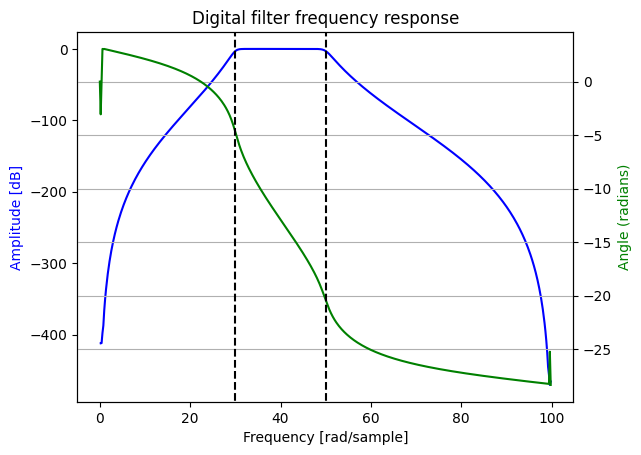

In [5]:
from scipy import signal
b,a=signal.butter(10, [30,50], 'bandpass', fs=200, output='ba')
w,h=signal.freqz(b,a)

fig, ax1 = plt.subplots()
frequencies_hz = (w / (2 * np.pi)) * 200
ax1.set_title('Digital filter frequency response')
# ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.plot(frequencies_hz, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
# ax2.plot(w, angles, 'g')
ax2.plot(frequencies_hz, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.vlines([30,50], -1e3, 1e3, colors='k', linestyles='dashed')
plt.show()

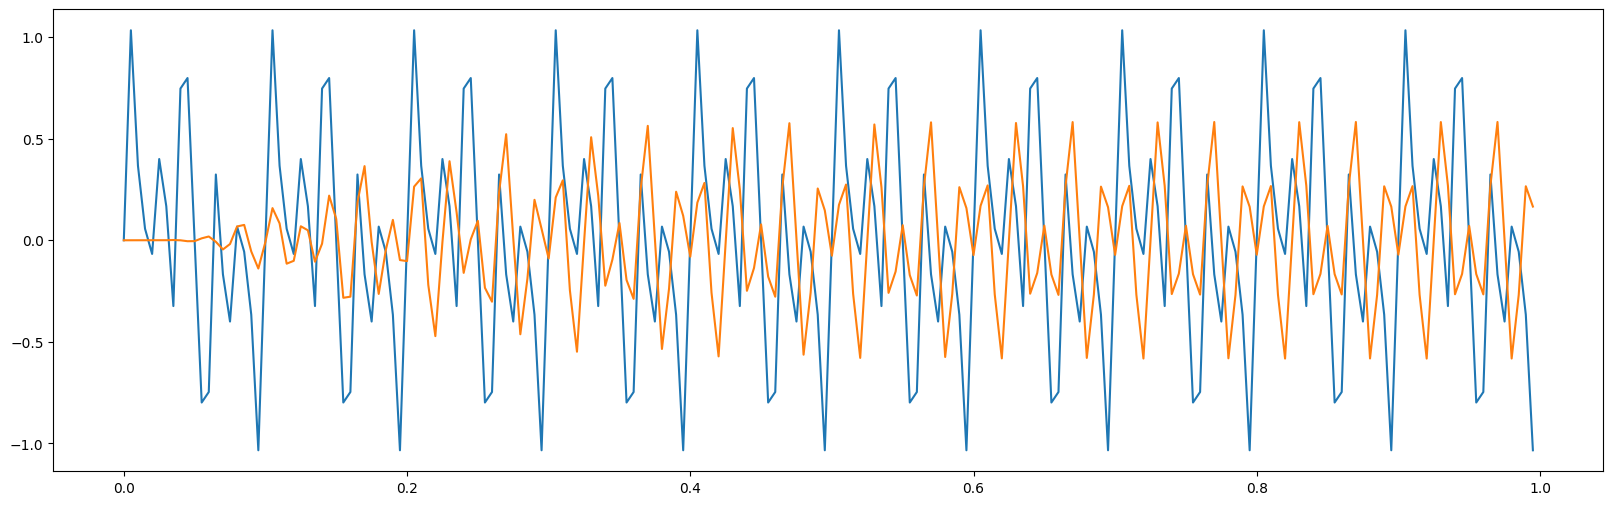

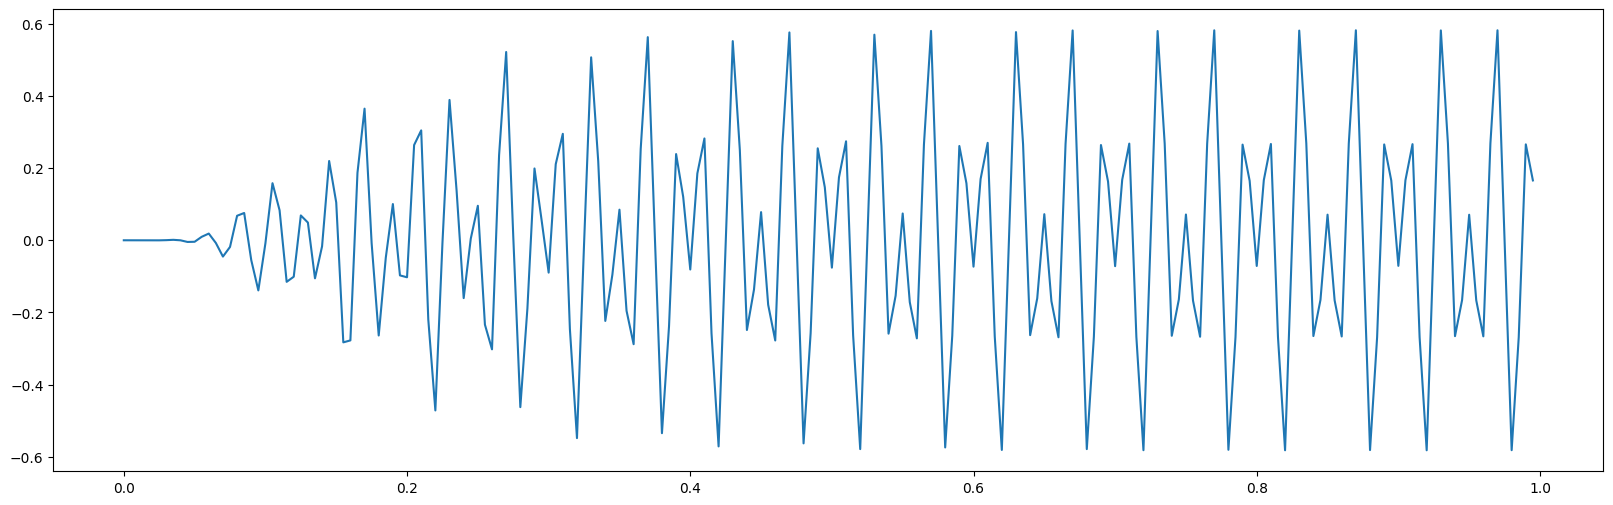

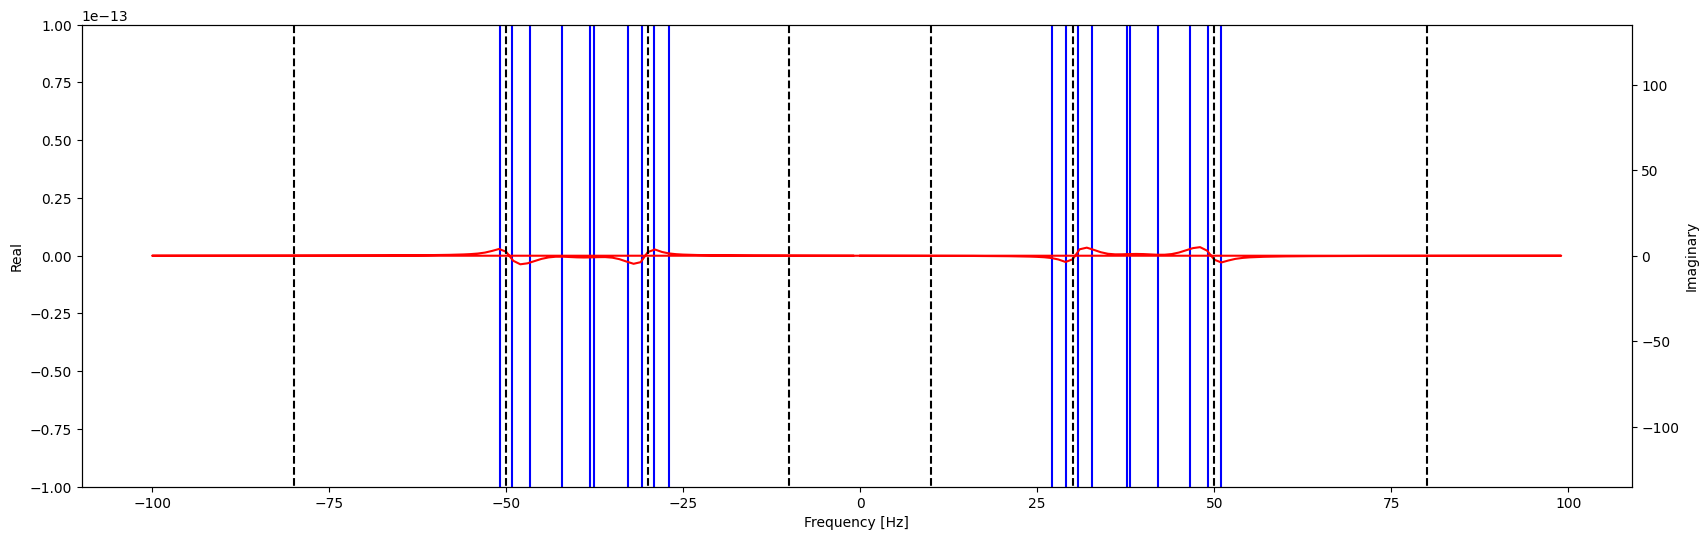

In [6]:
z = signal.lfilter(b, a, harm_200)
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0,1,len(harm_200), endpoint=False), harm_200)
plt.plot(np.linspace(0,1,len(z), endpoint=False), z)
f(z)


What do you observe in the spectrum of the filtered signal?<br>
<font color=blue> Your reply here: </font>

the last plot shows that only the 30 and 50 frequencies are left. others are filtered out.
but this has changed the plot significantly as the orange and blue plots are not similar anymore.
im not sure why the first part of the frequency plot has been flattened so much, im guessing its due to the filter requiring the entire wavelength to be present in the signal to preserve it.